In [54]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from sklearn.svm import SVC
import os

In [55]:
# to make this notebook's output stable across runs
np.random.seed(42) #allows the creation of reproducible random numbers

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout() #automatically adjust subplots parameters to give specified padding.
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [56]:
#code to draw plot of decision tree clf and decision tree with bagging
from matplotlib.colors import ListedColormap

def plot_desision_boundary(clf, X,y, axes=[-1.5,2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100) # creates array of 100 numbers from axes[0] to axes[1]
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] # concatenates the arrays column wise
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)

    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Boosting

Boosting or hypothesis boosting refer to any ensemble methods that can combine several weak learners into a strong learner.

In [57]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

In [58]:
X, y = make_moons(n_samples=1000,shuffle=True, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Ada boost

Ada boost increases the weight of training instances which are misclassified in the predecessor and then another predictor is trained using the updated weights and again it makes predictions on the training set, weights
are updated, and so on.

Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME (which stands for Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the predictors can estimate class probabilities (i.e., if they have a predict_proba()
method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better.

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1), n_estimators=200,
        algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

/home/tawheed/tawheed/Documents/Programming/Machine Learning/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)


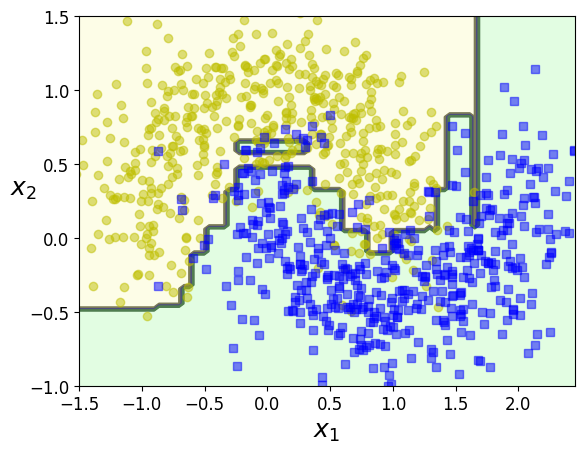

In [60]:
plot_desision_boundary(ada_clf, X, y)

/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6736/3308282759.py:14: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contour(x1,x2,y_pred, cmap=custom_cmap2, aplha=0.8)
/tmp/ipykernel_6

Saving figure boosting_plot


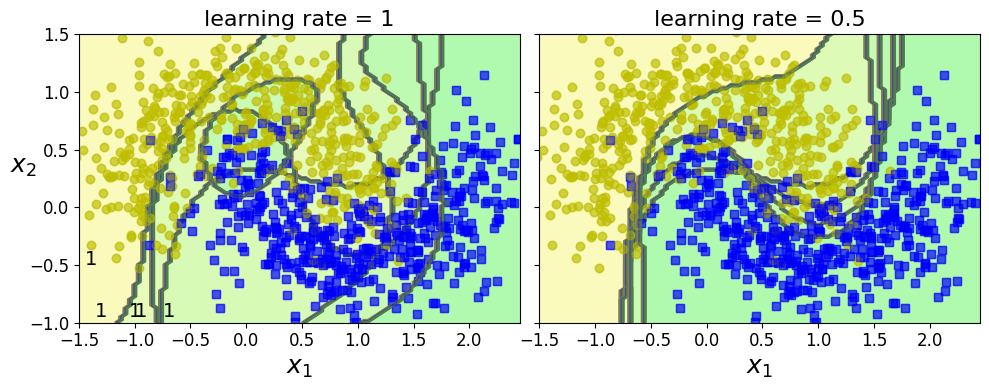

In [61]:
m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot , learning_rate in ((0,1), (1,0.5)):
    sample_weights = np.ones(m) / m 
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train , sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum()
        aplha = learning_rate * np.log((1-r) / r)
        sample_weights[y_pred != y_train] *= np.exp(aplha)
        sample_weights /= sample_weights.sum() 

        plot_desision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "1", fontsize=14)
        plt.text(-1.0, -0.95, "1", fontsize=14)
        plt.text(-1.45, -0.5, "1", fontsize=14)
        plt.text(-1.36, -0.95, "1", fontsize=14)
    else:
        plt.ylabel("")

save_fig("boosting_plot")
plt.show()

## Gradient boosting

Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor

In [62]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [63]:
from sklearn.tree import DecisionTreeRegressor
# First, let’s fit a DecisionTreeRegressor to the training set
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [64]:
# Now train a second DecisionTreeRegressor on the residual errors made by the first predictor:

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [65]:
# Then we train a third regressor on the residual errors made by the second predictor:

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [66]:
X_new = np.array([[0.8]])

In [67]:
# Now we have an ensemble containing three trees. It can make predictions on a new
# instance simply by adding up the predictions of all the trees:

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [68]:
y_pred

array([0.75026781])

In [69]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label="None"):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)

    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)

    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)

    plt.axis(axes)

Saving figure gradient_boosting_plot


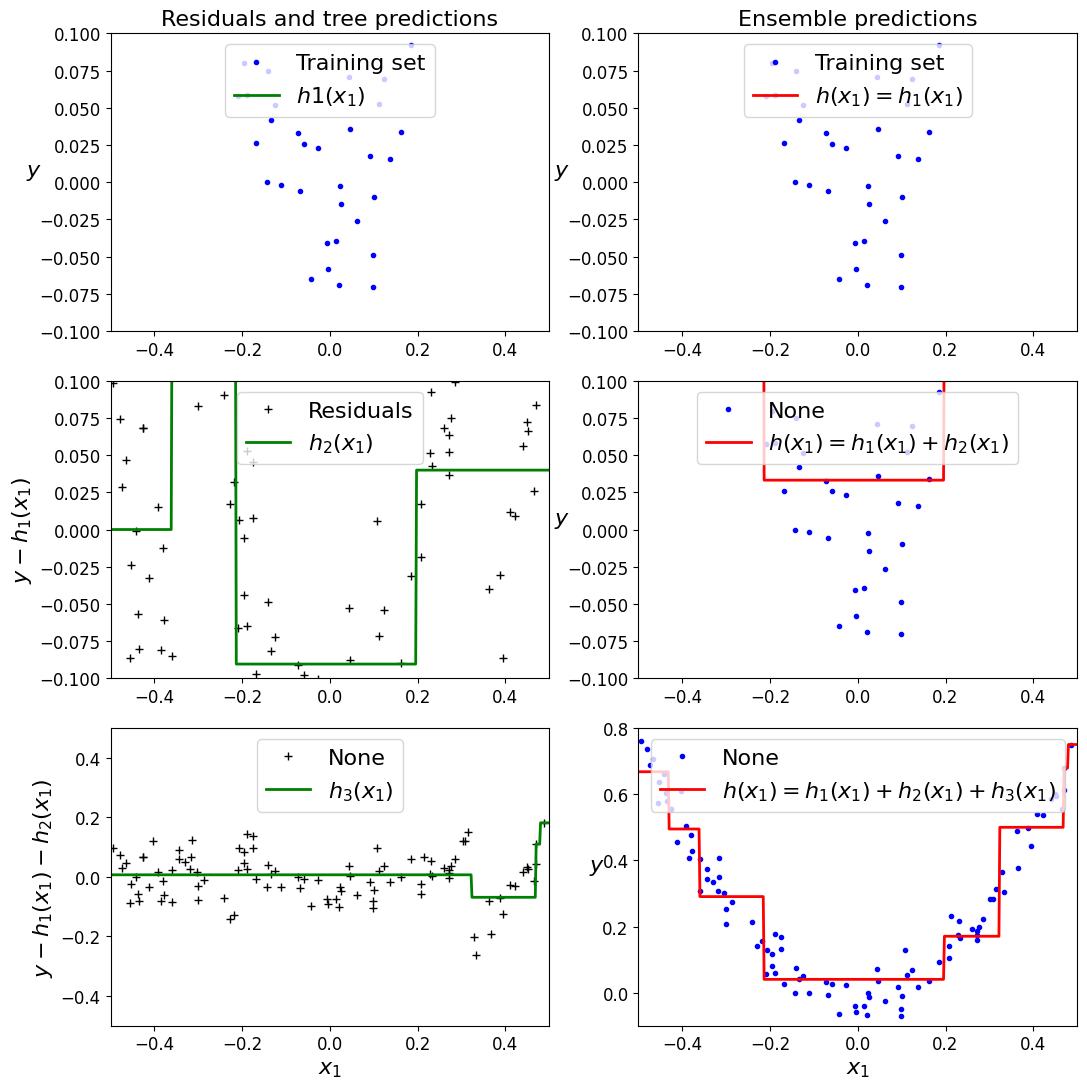

In [70]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5,0.5, -0.1,0.1], label="$h1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5,0.5, -0.1,0.1], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5,0.5, -0.1,0.1], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5,0.5, -0.1,0.1], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [72]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
# fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

# plt.sca(axes[0])
# plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
# plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
# plt.xlabel("$x_1$", fontsize=16)
# plt.ylabel("$y$", fontsize=16, rotation=0)

# plt.sca(axes[1])
# plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
# plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
# plt.xlabel("$x_1$", fontsize=16)

# save_fig("gbrt_learning_rate_plot")
# plt.show()